In [1]:
# importing packages
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer 
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

In [2]:
# reading the file into Python
original_df     = pd.read_excel('Apprentice_Chef_Dataset.xlsx')

In [3]:
# Checking for missing values
original_df.isnull().sum()


REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
MOBILE_LOGINS                    0
PC_LOGINS                        0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

In [4]:
# INFOrmation about each variable
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
PC_LOGINS                       1946 non-null int64
W

In [5]:
# one hot encoding variables
one_hot_PACKAGE_LOCKER               = pd.get_dummies(original_df['PACKAGE_LOCKER'])
one_hot_REFRIGERATED_LOCKER          = pd.get_dummies(original_df['REFRIGERATED_LOCKER'])
one_hot_TASTES_AND_PREFERENCES       = pd.get_dummies(original_df['TASTES_AND_PREFERENCES'])

# joining dataframes with dummy variables with original_df
original_df = pd.concat([original_df, one_hot_PACKAGE_LOCKER, one_hot_REFRIGERATED_LOCKER, one_hot_TASTES_AND_PREFERENCES], axis=1)

In [6]:
#naming new original_df columns 
original_df.columns = [         'REVENUE',           'CROSS_SELL_SUCCESS',
                                   'NAME',                        'EMAIL',
                             'FIRST_NAME',                  'FAMILY_NAME',
                    'TOTAL_MEALS_ORDERED',           'UNIQUE_MEALS_PURCH',
            'CONTACTS_W_CUSTOMER_SERVICE',    'PRODUCT_CATEGORIES_VIEWED',
                'AVG_TIME_PER_SITE_VISIT',                'MOBILE_NUMBER',
              'CANCELLATIONS_BEFORE_NOON',     'CANCELLATIONS_AFTER_NOON',
                 'TASTES_AND_PREFERENCES',                'MOBILE_LOGINS',
                              'PC_LOGINS',                  'WEEKLY_PLAN',
                       'EARLY_DELIVERIES',              'LATE_DELIVERIES',
                         'PACKAGE_LOCKER',          'REFRIGERATED_LOCKER',
           'FOLLOWED_RECOMMENDATIONS_PCT',            'AVG_PREP_VID_TIME',
                     'LARGEST_ORDER_SIZE',      'MASTER_CLASSES_ATTENDED',
                     'MEDIAN_MEAL_RATING',         'AVG_CLICKS_PER_VISIT',
                    'TOTAL_PHOTOS_VIEWED',           'NOT_PACKAGE_LOCKER',
                        'PACKAGED_LOCKER',      'NOT_REFRIGERATED_LOCKER',
                  'REFRIGERATED_LOCKER_D',    'NO_TASTES_AND_PREFERENCES', 
                                            'WITH_TASTES_AND_PREFERENCES']

In [7]:
#dropping categorical and string variables
original_df = original_df.drop(['TASTES_AND_PREFERENCES','PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'NAME', 'EMAIL',
                        'FIRST_NAME', 'FAMILY_NAME'], axis = 1)

In [8]:
# creating a (Pearson) correlation matrix
df_corr = original_df.corr().round(2)


# printing (Pearson) correlations with REVENUE
print(df_corr.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS              1.00
FOLLOWED_RECOMMENDATIONS_PCT    0.46
CANCELLATIONS_BEFORE_NOON       0.16
MOBILE_NUMBER                   0.10
WITH_TASTES_AND_PREFERENCES     0.08
REFRIGERATED_LOCKER_D           0.07
PACKAGED_LOCKER                 0.04
CONTACTS_W_CUSTOMER_SERVICE     0.04
MASTER_CLASSES_ATTENDED         0.04
MOBILE_LOGINS                   0.04
MEDIAN_MEAL_RATING              0.03
AVG_PREP_VID_TIME               0.03
EARLY_DELIVERIES                0.02
LARGEST_ORDER_SIZE              0.02
LATE_DELIVERIES                 0.01
TOTAL_PHOTOS_VIEWED             0.01
AVG_TIME_PER_SITE_VISIT         0.01
TOTAL_MEALS_ORDERED             0.01
PRODUCT_CATEGORIES_VIEWED       0.00
UNIQUE_MEALS_PURCH              0.00
REVENUE                         0.00
WEEKLY_PLAN                    -0.01
AVG_CLICKS_PER_VISIT           -0.04
NOT_PACKAGE_LOCKER             -0.04
PC_LOGINS                      -0.05
CANCELLATIONS_AFTER_NOON       -0.05
NOT_REFRIGERATED_LOCKER        -0.07
N

In [9]:
# declaring explanatory variables
original_data = original_df.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
original_target = original_df.loc[ : , 'CROSS_SELL_SUCCESS']

In [10]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            original_data,
            original_target,
            test_size = 0.25,
            random_state = 222,
            stratify = original_target)


# merging training data for statsmodels
original_train = pd.concat([X_train, y_train], axis = 1)

In [11]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
                                    REVENUE +
                                    TOTAL_MEALS_ORDERED +
                                    UNIQUE_MEALS_PURCH +
                                    CONTACTS_W_CUSTOMER_SERVICE +
                                    PRODUCT_CATEGORIES_VIEWED +
                                    AVG_TIME_PER_SITE_VISIT +
                                    CANCELLATIONS_BEFORE_NOON +
                                    CANCELLATIONS_AFTER_NOON +
                                    MOBILE_LOGINS +
                                    PC_LOGINS +
                                    WEEKLY_PLAN +
                                    EARLY_DELIVERIES +
                                    LATE_DELIVERIES +
                                    FOLLOWED_RECOMMENDATIONS_PCT +
                                    AVG_PREP_VID_TIME +
                                    LARGEST_ORDER_SIZE +
                                    MASTER_CLASSES_ATTENDED +
                                    MEDIAN_MEAL_RATING +
                                    AVG_CLICKS_PER_VISIT +
                                    TOTAL_PHOTOS_VIEWED +
                                    PACKAGED_LOCKER +
                                    REFRIGERATED_LOCKER_D +
                                    WITH_TASTES_AND_PREFERENCES""",
                                     data    = original_train)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full.summary()

Optimization terminated successfully.
         Current function value: 0.473480
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1435
Method:                           MLE   Df Model:                           23
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:                  0.2460
Time:                        23:27:12   Log-Likelihood:                -690.81
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 5.849e-81
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.0158      1.443     -0.011      0.991      -2.843       2.812
REVENUE                      -8.444e-05      0.000     -0.828      0.408      -0.000       0.000
TOTAL_MEALS_ORDERED              0.0013      0.002      0.851      0.395      -0.002       0.004
UNIQUE_MEALS_PURCH              -0.0023      0.028     -0.083      0.934      -0.057       0.052
CONTACTS_W_CUSTOMER_SERVICE     -0.0058      0.030     -0.196      0.844      -0.064       0.052
PRODUCT_CATEGORIES_VIEWED        0.0034      0.022      0.154      0.877      -0.039       0.046
AVG_TIME_PER_SITE_VISIT          0.0013      0.001      1.248      0.212      -0.001       0.003
CANCELLATIONS_BEFORE_NOON        0.2392      0.048      4.946      0.000       0.144       0.334
CANCELLATIONS_AFTER_NOON        -0.2055      0.149     -1.378      0.168      -0.498       0.087
MOBILE_LOGINS                    0.0830      0.112      0.742      0.458      -0.136       0.302
PC_LOGINS                       -0.3509      0.125     -2.817      0.005      -0.595      -0.107
WEEKLY_PLAN                      0.0017      0.005      0.356      0.722      -0.008       0.011
EARLY_DELIVERIES                 0.0356      0.030      1.203      0.229      -0.022       0.094
LATE_DELIVERIES                  0.0313      0.024      1.291      0.197      -0.016       0.079
FOLLOWED_RECOMMENDATIONS_PCT     0.0572      0.004     15.056      0.000       0.050       0.065
AVG_PREP_VID_TIME             5.536e-05      0.003      0.019      0.985      -0.006       0.006
LARGEST_ORDER_SIZE               0.0302      0.074      0.410      0.682      -0.114       0.174
MASTER_CLASSES_ATTENDED          0.1283      0.122      1.048      0.295      -0.112       0.368
MEDIAN_MEAL_RATING              -0.1581      0.180     -0.879      0.380      -0.511       0.195
AVG_CLICKS_PER_VISIT            -0.0944      0.055     -1.716      0.086      -0.202       0.013
TOTAL_PHOTOS_VIEWED           5.586e-05      0.000      0.124      0.901      -0.001       0.001
PACKAGED_LOCKER                 -0.1506      0.156     -0.964      0.335      -0.457       0.155
REFRIGERATED_LOCKER_D            0.4887      0.249      1.964      0.050       0.001       0.976
WITH_TASTES_AND_PREFERENCES      0.3466      0.144      2.401      0.016       0.064       0.630
================================================================================================
"""

In [12]:

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE', 'TOTAL_MEALS_ORDERED',
       'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
       'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT',
       'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON',
       'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN',
       'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED',
       'PACKAGED_LOCKER', 'REFRIGERATED_LOCKER_D'],
 
 # significant variables only
 'logit_sig'    : ['CANCELLATIONS_BEFORE_NOON' , 'PC_LOGINS', 'FOLLOWED_RECOMMENDATIONS_PCT', 'REFRIGERATED_LOCKER_D',
                   'WITH_TASTES_AND_PREFERENCES',]

}

In [13]:
# train/test split with the full model
original_data   =  original_df.loc[ : , candidate_dict['logit_sig']]
original_target =  original_df.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            original_data,
            original_target,
            random_state = 222,
            test_size    = 0.25,
            stratify     = original_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 222)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)

logreg_pred = logreg_fit.predict(X_test)

logreg_train_acc =logreg_fit.score(X_train, y_train).round(4)

logreg_test_acc = logreg_fit.score(X_test, y_test).round(4)


# PREDICTING based on the testing set
logreg_auc = roc_auc_score(y_true  = y_test,
                           y_score = logreg_pred).round(4)

model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]


model_performance.append(['Logistic Regression',
                          logreg_train_acc,
                          logreg_test_acc,
                          logreg_auc])

In [14]:
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=222,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1



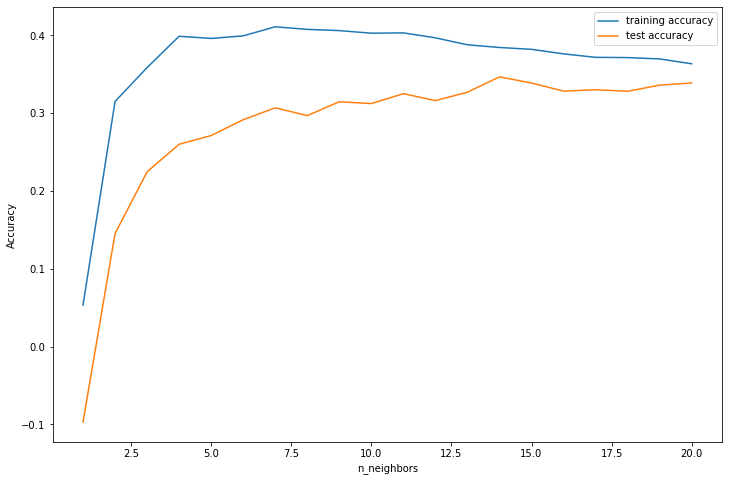

The optimal number of neighbors is: 14


In [15]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data = X_train,
                                  y_data = y_train)

In [16]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(original_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(original_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            original_target,
            random_state = 222,
            test_size = 0.25,
            stratify = original_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)

knn_train_acc = knn_fit.score(X_train_scaled, y_train_scaled).round(4)
knn_test_acc = knn_fit.score(X_test_scaled, y_test_scaled).round(4)
knn_auc = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)


# saving the results
model_performance.append(['KNN Classification',
                          knn_train_acc,
                          knn_test_acc,
                          knn_auc])

In [17]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)

# train accuracy
full_tree_train_acc = full_tree_fit.score(X_train, y_train).round(4)


# test accuracy
full_tree_test_acc  = full_tree_fit.score(X_test, y_test).round(4)


# auc value
full_tree_auc       = roc_auc_score(y_true  = y_test,
                                    y_score = full_tree_pred).round(4)


model_performance.append(['Full Tree',
                          full_tree_train_acc,
                          full_tree_test_acc,
                          full_tree_auc])


In [18]:
# INSTANTIATING a classification tree object
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 222)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# train accuracy
p_tree_train_acc = tree_pruned_fit.score(X_train, y_train).round(4)


# test accuracy
p_tree_test_acc  = tree_pruned_fit.score(X_test, y_test).round(4)


# auc value
p_tree_auc       = roc_auc_score(y_true  = y_test,
                                 y_score = tree_pred).round(4)


# saving the results
model_performance.append(['Pruned Tree',
                          p_tree_train_acc,
                          p_tree_test_acc,
                          p_tree_auc])


In [19]:
########################################
# GridSearchCV
########################################
"""
# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 3.0, 0.1)
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(solver = 'lbfgs',
                              random_state = 222)


# GridSearchCV object
lr_tuned_cv = GridSearchCV(estimator  = lr_tuned,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                                    needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(original_data, original_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

"""

'\n# declaring a hyperparameter space\nC_space          = pd.np.arange(0.1, 3.0, 0.1)\nwarm_start_space = [True, False]\n\n\n# creating a hyperparameter grid\nparam_grid = {\'C\'          : C_space,\n              \'warm_start\' : warm_start_space}\n\n\n# INSTANTIATING the model object without hyperparameters\nlr_tuned = LogisticRegression(solver = \'lbfgs\',\n                              random_state = 222)\n\n\n# GridSearchCV object\nlr_tuned_cv = GridSearchCV(estimator  = lr_tuned,\n                           param_grid = param_grid,\n                           cv         = 3,\n                           scoring    = make_scorer(roc_auc_score,\n                                                    needs_threshold = False))\n\n\n# FITTING to the FULL DATASET (due to cross-validation)\nlr_tuned_cv.fit(original_data, original_target)\n\n\n# PREDICT step is not needed\n\n\n# printing the optimal parameters and best score\nprint("Tuned Parameters  :", lr_tuned_cv.best_params_)\nprint("Tun

In [20]:
#From the GridSearch: Tuned Parameters  : {'C': 0.1, 'warm_start': True}
# INSTANTIATING a logistic regression model
lr_tuned = LogisticRegression(solver = 'lbfgs',
                            C = 0.1,
                            warm_start=True,
                            random_state = 222)


# FITTING the training data
lr_tuned_fit = lr_tuned.fit(X_train, y_train)


lr_tuned_train_acc =logreg_fit.score(X_train, y_train).round(4)

lr_tuned_test_acc = logreg_fit.score(X_test, y_test).round(4)


# PREDICTING based on the testing set
lr_tuned_auc = roc_auc_score(y_true  = y_test,
                           y_score = logreg_pred).round(4)

model_performance.append(['Tuned LR',
                          lr_tuned_train_acc,
                          lr_tuned_test_acc,
                          lr_tuned_auc])

In [21]:
########################################
# GridSearchCV
########################################
"""
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space = ['best', 'random']
depth_space = pd.np.arange(1, 25)
leaf_space  = pd.np.arange(1, 100)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 222)


# GridSearchCV object
tuned_tree_cv = GridSearchCV(estimator  = tuned_tree,
                             param_grid = param_grid,
                             cv         = 3,
                             scoring    = make_scorer(roc_auc_score,
                                                      needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(original_data, original_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))
"""

'\n# declaring a hyperparameter space\ncriterion_space = [\'gini\', \'entropy\']\nsplitter_space = [\'best\', \'random\']\ndepth_space = pd.np.arange(1, 25)\nleaf_space  = pd.np.arange(1, 100)\n\n\n# creating a hyperparameter grid\nparam_grid = {\'criterion\'        : criterion_space,\n              \'splitter\'         : splitter_space,\n              \'max_depth\'        : depth_space,\n              \'min_samples_leaf\' : leaf_space}\n\n\n# INSTANTIATING the model object without hyperparameters\ntuned_tree = DecisionTreeClassifier(random_state = 222)\n\n\n# GridSearchCV object\ntuned_tree_cv = GridSearchCV(estimator  = tuned_tree,\n                             param_grid = param_grid,\n                             cv         = 3,\n                             scoring    = make_scorer(roc_auc_score,\n                                                      needs_threshold = False))\n\n\n# FITTING to the FULL DATASET (due to cross-validation)\ntuned_tree_cv.fit(original_data, original_ta

In [22]:
# INSTANTIATING a classification tree object
tuned_tree = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 10,
                                   min_samples_leaf = 3,
                                   splitter = 'random',
                                   random_state = 222)


# FITTING the training data
tuned_tree_fit = tuned_tree.fit(X_train, y_train)


# PREDICTING on new data
tuned_tree_pred = tuned_tree_fit.predict(X_test)

# train accuracy
tuned_tree_train_acc = tuned_tree.score(X_train, y_train).round(4)


# test accuracy
tuned_tree_test_acc  = tuned_tree.score(X_test, y_test).round(4)


# auc value
tuned_tree_auc       = roc_auc_score(y_true  = y_test,
                                    y_score = tuned_tree_pred).round(4)


model_performance.append(['Tuned Tree',
                          tuned_tree_train_acc,
                          tuned_tree_test_acc,
                          tuned_tree_auc])

In [23]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 10,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 222)


# FITTING the training data
rf_default_fit = rf_default.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test)



rf_train_score = rf_default_fit.score(X_train, y_train).round(4)
rf_test_score = rf_default_fit.score(X_test, y_test).round(4)
rf_auc_score  = roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4)

model_performance.append(['Random Forest',
                          rf_train_score,
                          rf_test_score,
                          rf_auc_score])

In [24]:
########################################
# GridSearchCV
########################################
"""
# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_forest_grid = RandomForestClassifier(random_state = 802)


# GridSearchCV object
full_forest_cv = GridSearchCV(estimator  = full_forest_grid,
                              param_grid = param_grid,
                              cv         = 3,
                              scoring    = make_scorer(roc_auc_score,
                                           needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_forest_cv.fit(original_data, original_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_forest_cv.best_params_)
print("Tuned Training AUC:", full_forest_cv.best_score_.round(4))

"""

'\n# declaring a hyperparameter space\nestimator_space  = pd.np.arange(100, 1100, 250)\nleaf_space       = pd.np.arange(1, 31, 10)\ncriterion_space  = [\'gini\', \'entropy\']\nbootstrap_space  = [True, False]\nwarm_start_space = [True, False]\n\n\n# creating a hyperparameter grid\nparam_grid = {\'n_estimators\'     : estimator_space,\n              \'min_samples_leaf\' : leaf_space,\n              \'criterion\'        : criterion_space,\n              \'bootstrap\'        : bootstrap_space,\n              \'warm_start\'       : warm_start_space}\n\n\n# INSTANTIATING the model object without hyperparameters\nfull_forest_grid = RandomForestClassifier(random_state = 802)\n\n\n# GridSearchCV object\nfull_forest_cv = GridSearchCV(estimator  = full_forest_grid,\n                              param_grid = param_grid,\n                              cv         = 3,\n                              scoring    = make_scorer(roc_auc_score,\n                                           needs_threshold 

In [25]:
# INSTANTIATING the model object without hyperparameters
rf_tuned = RandomForestClassifier(bootstrap        = True,
                                       criterion        = 'entropy',
                                       min_samples_leaf = 1,
                                       n_estimators     = 350,
                                       warm_start       = True,
                                       random_state     = 222)


# FIT step is needed as we are not using .best_estimator
rf_tuned_fit = rf_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_tuned_pred = rf_tuned_fit.predict(X_test)


tuned_rf_train_acc = rf_tuned_fit.score(X_train, y_train).round(4)
tuned_rf_train_accrf_test_acc  = rf_tuned_fit.score(X_test, y_test).round(4)
tuned_rf_train_accrf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_tuned_pred).round(4)


model_performance.append(['Tuned Random Forest',
                          tuned_rf_train_acc,
                          tuned_rf_train_accrf_test_acc,
                          tuned_rf_train_accrf_auc])

In [26]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 222)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(X_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(X_test)



full_gbm_default_train_acc = full_gbm_default_fit.score(X_train, y_train).round(4)
full_gbm_default_train_test  = full_gbm_default_fit.score(X_test, y_test).round(4)
full_gbm_default_train_auc       = roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4)


model_performance.append(['full_gbm_default',
                          full_gbm_default_train_acc,
                          full_gbm_default_train_test,
                          full_gbm_default_train_auc])

In [27]:
########################################
# GridSearchCV
########################################
"""
# declaring a hyperparameter space
learn_space     = pd.np.arange(0.1, 1.6, 0.3)
estimator_space = pd.np.arange(50, 250, 50)
depth_space     = pd.np.arange(1, 10)


# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 802)


# GridSearchCV object
full_gbm_cv = GridSearchCV(estimator  = full_gbm_grid,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                        needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(original_data, original_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))
"""

'\n# declaring a hyperparameter space\nlearn_space     = pd.np.arange(0.1, 1.6, 0.3)\nestimator_space = pd.np.arange(50, 250, 50)\ndepth_space     = pd.np.arange(1, 10)\n\n\n# creating a hyperparameter grid\nparam_grid = {\'learning_rate\' : learn_space,\n              \'max_depth\'     : depth_space,\n              \'n_estimators\'  : estimator_space}\n\n\n# INSTANTIATING the model object without hyperparameters\nfull_gbm_grid = GradientBoostingClassifier(random_state = 802)\n\n\n# GridSearchCV object\nfull_gbm_cv = GridSearchCV(estimator  = full_gbm_grid,\n                           param_grid = param_grid,\n                           cv         = 3,\n                           scoring    = make_scorer(roc_auc_score,\n                                        needs_threshold = False))\n\n\n# FITTING to the FULL DATASET (due to cross-validation)\nfull_gbm_cv.fit(original_data, original_target)\n\n\n# PREDICT step is not needed\n\n\n# printing the optimal parameters and best score\nprint

In [28]:
# INSTANTIATING the model object without hyperparameters
gbm_tuned = GradientBoostingClassifier(learning_rate = 1.3,
                                       max_depth     = 8,
                                       n_estimators  = 100,
                                       random_state  = 222)


# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(X_test)





gbm_tuned_train_acc = gbm_tuned_fit.score(X_train, y_train).round(4)
gbm_tuned_train_test  = gbm_tuned_fit.score(X_test, y_test).round(4)
gbm_tuned_train_auc       = roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4)

model_performance.append(['Tuned GBM',
                          gbm_tuned_train_acc,
                          gbm_tuned_train_test,
                          gbm_tuned_train_auc])

In [29]:
model_performance

[['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value'],
 ['Logistic Regression', 0.7121, 0.7043, 0.652],
 ['KNN Classification', 0.7923, 0.7515, 0.7189],
 ['Full Tree', 0.8239, 0.7536, 0.7374],
 ['Pruned Tree', 0.7868, 0.7721, 0.7612],
 ['Tuned LR', 0.7121, 0.7043, 0.652],
 ['Tuned Tree', 0.8088, 0.7474, 0.7346],
 ['Random Forest', 0.8239, 0.7639, 0.7449],
 ['Tuned Random Forest', 0.8239, 0.7577, 0.7387],
 ['full_gbm_default', 0.8074, 0.77, 0.7613],
 ['Tuned GBM', 0.8239, 0.7618, 0.7468]]